## Hourly temperature for main cities in Spain

- Information exported from ERA5
(https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-pressure-levels?tab=overview)

- 2m dewpoint temperature	(K)

- This parameter is the temperature to which the air, at 2 metres above the surface of the Earth, would have to be cooled for saturation to occur. It is a measure of the humidity of the air. Combined with temperature and pressure, it can be used to calculate the relative humidity. 2m dew point temperature is calculated by interpolating between the lowest model level and the Earth's surface, taking account of the atmospheric conditions. This parameter has units of kelvin (K). Temperature measured in kelvin can be converted to degrees Celsius (°C) by subtracting 273.15.

- UTC (Coordinated Universal Time)

In [28]:
# Ignore warnings ignore
import warnings
warnings.filterwarnings('ignore')

In [31]:
#import libraries
import pandas as pd
import numpy as np
import cdsapi
import netCDF4
#import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## List of cities
Main cities: Latitud, longitud 

- Asturias - Oviedo: North 43.4°, West -5.8°, South 43.3°, East -5.7°
- Madrid - Madrid: North 40.4°, West -3.7°, South 40.3°, East -3.6°
- Cataluña - Barcelona: North 41.4°, West 2.1°, South 41.3°, East 2.2°
- Comunidad Valenciana - Valencia: North 39.5°, West -0.37°, South 39.4°, East -0.38°
- Andalucia - Sevilla: North 37.4°, West -6.0°, South 37.3°, East -5.9°
- Aragón - Zaragoza: North 41.7°, West -0.8°, South 41.6°, East -0.9°
- Murcia - Murcia: North 38.0°, West -1.1°, South 37.9°, East -1.2°
- País Vasco - Bilbao: North 43.3°, West -2.8°, South 43.2°, East -2.9° 
- Galicia - Vigo: North 42.2°, West -8.6°, South 42.1°, East -8.7°
- Castilla y León - Valladolid: North 41.7°, West -4.6°, South 41.6°, East -4.7°
- Cantabria - Santander: North 43.5°, West -3.7°, South 43.4°, East -3.8°
- La Rioja - Logroño: North 42.5°, West -2.4°, South 42.4°, East -2.5°
- Navarra - Pamplona: North 42.9°, West -1.6°, South 42.8°, East -1.7°
- Castilla la mancha - Albacete: North 39.0°, West -1.8°, South 38.9°, East -1.9°
- Extremadura - Badajoz: North 38.9°, West -6.9°, South 38.8°, East -7.0°

In [2]:
#For each city a file is exported with 4 geographical points
file_list=['Oviedo','Madrid','Barcelona','Valencia','Sevilla','Zaragoza','Bilbao','Vigo','Santander',
           'Pamplona','Albacete','Badajoz','Murcia','Valladolid','Logroño']

## Data extration

In [3]:
%%time
df_temperatures = []
for file in file_list:
    #Defining paths
    path="../../Data/SOTs/Hourly_Temperature/Cities/"+file+".nc"
    
    #Defining empty dataframes (each dataframe is a coordinate point)
    df_point_1=pd.DataFrame()
    df_point_2=pd.DataFrame()
    df_point_3=pd.DataFrame()
    df_point_4=pd.DataFrame() 
    df_time=pd.DataFrame() 
    
    #Defining nc object
    nc=netCDF4.Dataset(path,'r')
    
    #Extracting time
    time=nc.variables['time']
    dtime=netCDF4.num2date(time[:],time.units)
    df_time['Time']=np.array(dtime,dtype=type(dtime))
    
    #Extracting temperatures
    temp_p1=np.array(nc.variables['d2m'][:,0,0],dtype=type(nc.variables['d2m'][:,0,0]))
    temp_p2=np.array(nc.variables['d2m'][:,0,1],dtype=type(nc.variables['d2m'][:,0,1]))
    temp_p3=np.array(nc.variables['d2m'][:,1,0],dtype=type(nc.variables['d2m'][:,1,0]))
    temp_p4=np.array(nc.variables['d2m'][:,1,1],dtype=type(nc.variables['d2m'][:,1,1]))
    
    df_point_1['Temp']=temp_p1
    df_point_2['Temp']=temp_p2
    df_point_3['Temp']=temp_p3
    df_point_4['Temp']=temp_p4
    
    #Concatenation of 4 points     
    df_city=pd.concat([df_point_1,df_point_2,df_point_3,df_point_4])
    
    #Merging time dimension
    df_city=pd.merge(df_city, df_time,left_index=True, right_index=True)
    
    #Including city values
    df_city['City']=file
    
    #Storing each city values
    df_temperatures.append(df_city)

#Concatenating all cities 
df_temperatures = pd.concat(df_temperatures)
df_temperatures.to_csv("../../Data/SOTs/Hourly_Temperature/raw_temperatures.csv")

CPU times: user 39.5 s, sys: 1min 28s, total: 2min 8s
Wall time: 6min 46s


## Data cleaning

In [4]:
#Importing Dataframe
df_raw_temperatures=pd.read_csv("../../Data/SOTs/Hourly_Temperature/raw_temperatures.csv")
df_raw_temperatures

,Unnamed: 0,Temp,Time,City
0,0,269.887412,2015-01-01 00:00:00,Oviedo
1,0,270.258563,2015-01-01 00:00:00,Oviedo
2,0,268.819181,2015-01-01 00:00:00,Oviedo
3,0,269.266227,2015-01-01 00:00:00,Oviedo
4,1,269.308332,2015-01-01 01:00:00,Oviedo
...,...,...,...,...
3726775,62111,276.276933,2022-01-31 23:00:00,Logroño
3726776,62112,276.833856,2022-02-01 00:00:00,Logroño
3726777,62112,276.837545,2022-02-01 00:00:00,Logroño
3726778,62112,276.216692,2022-02-01 00:00:00,Logroño


In [5]:
#Dropping not needed columns
df_raw_temperatures = df_raw_temperatures.drop('Unnamed: 0', 1)

/Users/malva/miniconda3/envs/final-project/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [8]:
# Splitting time columns
df_raw_temperatures['Time']=pd.to_datetime(df_raw_temperatures['Time'], format="%Y-%m-%d %H:%M:%S")
df_raw_temperatures['Year']=df_raw_temperatures['Time'].dt.year
df_raw_temperatures['Month']=df_raw_temperatures['Time'].dt.month
df_raw_temperatures['Day']=df_raw_temperatures['Time'].dt.day
df_raw_temperatures['Hour']=df_raw_temperatures['Time'].dt.hour
df_raw_temperatures['Date']=df_raw_temperatures['Time'].dt.date
df_raw_temperatures

,Temp,Time,City,Year,Month,Day,Hour,Date
0,269.887412,2015-01-01 00:00:00,Oviedo,2015,1,1,0,2015-01-01
1,270.258563,2015-01-01 00:00:00,Oviedo,2015,1,1,0,2015-01-01
2,268.819181,2015-01-01 00:00:00,Oviedo,2015,1,1,0,2015-01-01
3,269.266227,2015-01-01 00:00:00,Oviedo,2015,1,1,0,2015-01-01
4,269.308332,2015-01-01 01:00:00,Oviedo,2015,1,1,1,2015-01-01
...,...,...,...,...,...,...,...,...
3726775,276.276933,2022-01-31 23:00:00,Logroño,2022,1,31,23,2022-01-31
3726776,276.833856,2022-02-01 00:00:00,Logroño,2022,2,1,0,2022-02-01
3726777,276.837545,2022-02-01 00:00:00,Logroño,2022,2,1,0,2022-02-01
3726778,276.216692,2022-02-01 00:00:00,Logroño,2022,2,1,0,2022-02-01


In [10]:
df_raw_temperatures = df_raw_temperatures[['City', 'Time','Date', 'Year', 'Month','Day','Hour','Temp']]
df_raw_temperatures

,City,Time,Date,Year,Month,Day,Hour,Temp
0,Oviedo,2015-01-01 00:00:00,2015-01-01,2015,1,1,0,269.887412
1,Oviedo,2015-01-01 00:00:00,2015-01-01,2015,1,1,0,270.258563
2,Oviedo,2015-01-01 00:00:00,2015-01-01,2015,1,1,0,268.819181
3,Oviedo,2015-01-01 00:00:00,2015-01-01,2015,1,1,0,269.266227
4,Oviedo,2015-01-01 01:00:00,2015-01-01,2015,1,1,1,269.308332
...,...,...,...,...,...,...,...,...
3726775,Logroño,2022-01-31 23:00:00,2022-01-31,2022,1,31,23,276.276933
3726776,Logroño,2022-02-01 00:00:00,2022-02-01,2022,2,1,0,276.833856
3726777,Logroño,2022-02-01 00:00:00,2022-02-01,2022,2,1,0,276.837545
3726778,Logroño,2022-02-01 00:00:00,2022-02-01,2022,2,1,0,276.216692


In [11]:
#date time is from 2015 to 2021
df_raw_temperatures=df_raw_temperatures[(df_raw_temperatures['Year']>2014) & (df_raw_temperatures['Year']<2022)]
df_raw_temperatures

,City,Time,Date,Year,Month,Day,Hour,Temp
0,Oviedo,2015-01-01 00:00:00,2015-01-01,2015,1,1,0,269.887412
1,Oviedo,2015-01-01 00:00:00,2015-01-01,2015,1,1,0,270.258563
2,Oviedo,2015-01-01 00:00:00,2015-01-01,2015,1,1,0,268.819181
3,Oviedo,2015-01-01 00:00:00,2015-01-01,2015,1,1,0,269.266227
4,Oviedo,2015-01-01 01:00:00,2015-01-01,2015,1,1,1,269.308332
...,...,...,...,...,...,...,...,...
3723795,Logroño,2021-12-31 22:00:00,2021-12-31,2021,12,31,22,276.369139
3723796,Logroño,2021-12-31 23:00:00,2021-12-31,2021,12,31,23,277.376026
3723797,Logroño,2021-12-31 23:00:00,2021-12-31,2021,12,31,23,277.517409
3723798,Logroño,2021-12-31 23:00:00,2021-12-31,2021,12,31,23,275.175382


In [12]:
#Checking we have all cities
df_raw_temperatures['City'].unique()

array(['Oviedo', 'Madrid', 'Barcelona', 'Valencia', 'Sevilla', 'Zaragoza',
       'Bilbao', 'Vigo', 'Santander', 'Pamplona', 'Albacete', 'Badajoz',
       'Murcia', 'Valladolid', 'Logroño'], dtype=object)

## Check if we have all years, months, days and hours

In [15]:
#Check we have all years
for i in ['Oviedo', 'Madrid', 'Barcelona', 'Valencia', 'Sevilla', 'Zaragoza',
       'Bilbao', 'Vigo', 'Santander', 'Pamplona', 'Albacete', 'Badajoz',
       'Murcia', 'Valladolid', 'Logroño']:
    print(df_raw_temperatures['Year'][(df_raw_temperatures['City']==i)].unique())
    for x in [2015,2016,2017,2018,2019,2020,2021]:
        print(i)
        print(df_raw_temperatures['Month'][(df_raw_temperatures['Year']==x)].unique())
    

[2015 2016 2017 2018 2019 2020 2021]
Oviedo
[ 1  2  3  4  5  6  7  8  9 10 11 12]
Oviedo
[ 1  2  3  4  5  6  7  8  9 10 11 12]
Oviedo
[ 1  2  3  4  5  6  7  8  9 10 11 12]
Oviedo
[ 1  2  3  4  5  6  7  8  9 10 11 12]
Oviedo
[ 1  2  3  4  5  6  7  8  9 10 11 12]
Oviedo
[ 1  2  3  4  5  6  7  8  9 10 11 12]
Oviedo
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[2015 2016 2017 2018 2019 2020 2021]
Madrid
[ 1  2  3  4  5  6  7  8  9 10 11 12]
Madrid
[ 1  2  3  4  5  6  7  8  9 10 11 12]
Madrid
[ 1  2  3  4  5  6  7  8  9 10 11 12]
Madrid
[ 1  2  3  4  5  6  7  8  9 10 11 12]
Madrid
[ 1  2  3  4  5  6  7  8  9 10 11 12]
Madrid
[ 1  2  3  4  5  6  7  8  9 10 11 12]
Madrid
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[2015 2016 2017 2018 2019 2020 2021]
Barcelona
[ 1  2  3  4  5  6  7  8  9 10 11 12]
Barcelona
[ 1  2  3  4  5  6  7  8  9 10 11 12]
Barcelona
[ 1  2  3  4  5  6  7  8  9 10 11 12]
Barcelona
[ 1  2  3  4  5  6  7  8  9 10 11 12]
Barcelona
[ 1  2  3  4  5  6  7  8  9 10 11 12]
Barcelona
[ 1  2  3

In [19]:
#All days in each month:
df_raw_temperatures.groupby(['Year','Month','City'],as_index=False).agg({'Temp':'count'})
df_raw_temperatures.groupby(['Year','Month','City'],as_index=False).agg({'Temp':'count'})['Temp'].unique()/4

array([744., 672., 720., 696.])

In [22]:
#All hours in each day
df_raw_temperatures.groupby(['Date','City'],as_index=False).agg({'Temp':'count'})['Temp'].unique()/4

array([24.])

## Checking temperature values quality

In [24]:
#Checking values
df_raw_temperatures.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3682080 entries, 0 to 3723799
Data columns (total 8 columns):
 #   Column  Dtype         
---  ------  -----         
 0   City    object        
 1   Time    datetime64[ns]
 2   Date    object        
 3   Year    int64         
 4   Month   int64         
 5   Day     int64         
 6   Hour    int64         
 7   Temp    float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 252.8+ MB


In [25]:
#min -327943,15
#max 26 grados
df_raw_temperatures.describe()

,Year,Month,Day,Hour,Temp
count,3682080.0,3.682080e+06,3.682080e+06,3.682080e+06,3.682080e+06
mean,2018.0,6.522487e+00,1.573093e+01,1.150000e+01,-1.921566e+03
std,2.0,3.448825e+00,8.800641e+00,6.922187e+00,8.243792e+03
min,2015.0,1.000000e+00,1.000000e+00,0.000000e+00,-3.276700e+04
25%,2016.0,4.000000e+00,8.000000e+00,5.750000e+00,2.768734e+02
50%,2018.0,7.000000e+00,1.600000e+01,1.150000e+01,2.810564e+02
75%,2020.0,1.000000e+01,2.300000e+01,1.725000e+01,2.853689e+02
max,2021.0,1.200000e+01,3.100000e+01,2.300000e+01,3.002815e+02


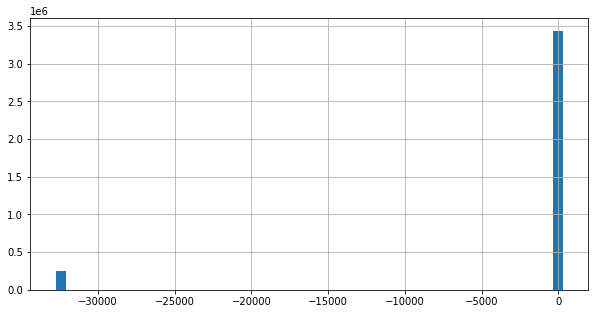

In [34]:
#There is an outliter
df_raw_temperatures['Temp'].hist(bins = 50, figsize = (10, 5))
plt.show()

In [35]:
df_raw_temperatures['Temp'].min()

-32767.0

In [39]:
#Main cities with the problem
df_raw_temperatures['City'][df_raw_temperatures['Temp']==-32767.0].unique()

array(['Barcelona', 'Valencia', 'Santander'], dtype=object)

In [45]:
#Do we have all times if we exclude this value?
#There are some incorrect values in the dataframe (temperature can not be lower than 263.15 k in spain)
#Filtering out those values
df_raw_temperatures=df_raw_temperatures[df_raw_temperatures['Temp']!=-32767.0]
df_raw_temperatures

,City,Time,Date,Year,Month,Day,Hour,Temp
0,Oviedo,2015-01-01 00:00:00,2015-01-01,2015,1,1,0,269.887412
1,Oviedo,2015-01-01 00:00:00,2015-01-01,2015,1,1,0,270.258563
2,Oviedo,2015-01-01 00:00:00,2015-01-01,2015,1,1,0,268.819181
3,Oviedo,2015-01-01 00:00:00,2015-01-01,2015,1,1,0,269.266227
4,Oviedo,2015-01-01 01:00:00,2015-01-01,2015,1,1,1,269.308332
...,...,...,...,...,...,...,...,...
3723795,Logroño,2021-12-31 22:00:00,2021-12-31,2021,12,31,22,276.369139
3723796,Logroño,2021-12-31 23:00:00,2021-12-31,2021,12,31,23,277.376026
3723797,Logroño,2021-12-31 23:00:00,2021-12-31,2021,12,31,23,277.517409
3723798,Logroño,2021-12-31 23:00:00,2021-12-31,2021,12,31,23,275.175382


## Data transformation: calculating the average of 4 points for each city

In [44]:
#Calculating the mean of 4 points by City and time
df_temperatures=df_raw_temperatures.groupby(['Time','Date','Year','Month',
                                             'Day','Hour','City'], as_index=False).agg({'Temp':'mean'})
df_temperatures

,Time,Date,Year,Month,Day,Hour,City,Temp
0,2015-01-01 00:00:00,2015-01-01,2015,1,1,0,Albacete,268.948527
1,2015-01-01 00:00:00,2015-01-01,2015,1,1,0,Badajoz,272.818933
2,2015-01-01 00:00:00,2015-01-01,2015,1,1,0,Barcelona,276.065316
3,2015-01-01 00:00:00,2015-01-01,2015,1,1,0,Bilbao,272.969665
4,2015-01-01 00:00:00,2015-01-01,2015,1,1,0,Logroño,266.218819
...,...,...,...,...,...,...,...,...
920515,2021-12-31 23:00:00,2021-12-31,2021,12,31,23,Sevilla,281.146932
920516,2021-12-31 23:00:00,2021-12-31,2021,12,31,23,Valencia,279.901981
920517,2021-12-31 23:00:00,2021-12-31,2021,12,31,23,Valladolid,275.407475
920518,2021-12-31 23:00:00,2021-12-31,2021,12,31,23,Vigo,278.176621


In [46]:
df_raw_temperatures['City'].unique()

array(['Oviedo', 'Madrid', 'Barcelona', 'Valencia', 'Sevilla', 'Zaragoza',
       'Bilbao', 'Vigo', 'Santander', 'Pamplona', 'Albacete', 'Badajoz',
       'Murcia', 'Valladolid', 'Logroño'], dtype=object)

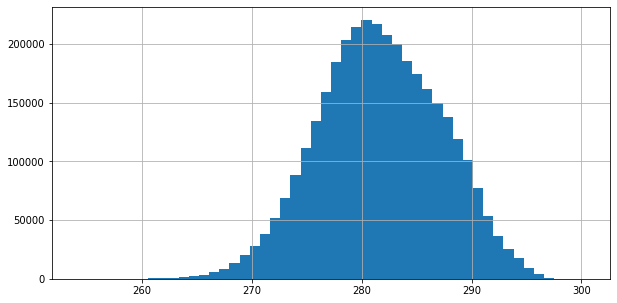

In [51]:
df_raw_temperatures['Temp'].hist(bins = 50, figsize = (10, 5))
plt.show()

## Check if we have all years, months, days and hours

In [47]:
for i in [2015,2016,2017,2018,2019,2020,2021]:
    print(df_temperatures['Month'][(df_temperatures['Year']==i)].unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[ 1  2  3  4  5  6  7  8  9 10 11 12]


In [48]:
#All days in each month - Problem, it seems we don't have all hours/days for all cities!!!
df_temperatures.groupby(['Year','Month','City'],as_index=False).agg({'Temp':'count'})
df_temperatures.groupby(['Year','Month','City'],as_index=False).agg({'Temp':'count'})['Temp'].unique()

array([744, 672, 720, 696])

In [49]:
#All hours in each day, it seems we don't have all days for all cities!!!
df_temperatures.groupby(['Date','City'],as_index=False).agg({'Temp':'count'})['Temp'].unique()

array([24])

In [50]:
#sending data to csv
df_temperatures.to_csv("../../Data/Raw_Data/temperatures.csv")